# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q="
#params = {"appid":weather_api_key,"limit":1}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | happy valley-goose bay
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | nogliki
Processing Record 18 of Set 1 | selfoss
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | limassol
Processing Record 21 of Set 1 

Processing Record 41 of Set 4 | rikaze
Processing Record 42 of Set 4 | port glaud
City not found. Skipping...
Processing Record 43 of Set 4 | san antonio de pale
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | al 'amarah
Processing Record 46 of Set 4 | espargos
City not found. Skipping...
Processing Record 47 of Set 4 | ormond-by-the-sea
Processing Record 48 of Set 4 | nueva gerona
Processing Record 49 of Set 4 | falmouth
Processing Record 0 of Set 5 | saryozek
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | westerland
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | berezovyy
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | maslovka
Processing Record 9 of Set 5 | pionerskiy
Processing Record 10 of Set 5 | sao vicente
Processing Record 11 of Set 5 | puerto aysen
Processing Record 12 of Set 5 | kone
Processing Record 13 o

Processing Record 32 of Set 8 | sendafa
Processing Record 33 of Set 8 | yako
Processing Record 34 of Set 8 | nema
Processing Record 35 of Set 8 | box elder
Processing Record 36 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 37 of Set 8 | luwingu
Processing Record 38 of Set 8 | la'ie
Processing Record 39 of Set 8 | zaozersk
Processing Record 40 of Set 8 | harper
Processing Record 41 of Set 8 | bac lieu
Processing Record 42 of Set 8 | khandud
Processing Record 43 of Set 8 | las terrenas
Processing Record 44 of Set 8 | kargil
Processing Record 45 of Set 8 | san jose village
City not found. Skipping...
Processing Record 46 of Set 8 | sao gabriel da cachoeira
Processing Record 47 of Set 8 | itoman
Processing Record 48 of Set 8 | eureka
Processing Record 49 of Set 8 | fort bragg
Processing Record 0 of Set 9 | katsuura
Processing Record 1 of Set 9 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 2 of Set 9 | aasiaat
Processing Record 3 of Set 9 | panaba
Processing Record 

Processing Record 23 of Set 12 | jamiltepec
Processing Record 24 of Set 12 | mansa
Processing Record 25 of Set 12 | kerman
Processing Record 26 of Set 12 | dryden
Processing Record 27 of Set 12 | nyagan
Processing Record 28 of Set 12 | goure
Processing Record 29 of Set 12 | manatutu
City not found. Skipping...
Processing Record 30 of Set 12 | machico
Processing Record 31 of Set 12 | saint-philippe
Processing Record 32 of Set 12 | urangan
Processing Record 33 of Set 12 | belem do brejo do cruz
Processing Record 34 of Set 12 | hasaki
Processing Record 35 of Set 12 | porbandar
Processing Record 36 of Set 12 | novyy urgal
Processing Record 37 of Set 12 | porto novo
Processing Record 38 of Set 12 | port saint mary
City not found. Skipping...
Processing Record 39 of Set 12 | cairns city
City not found. Skipping...
Processing Record 40 of Set 12 | guerrero negro
Processing Record 41 of Set 12 | porto velho
-----------------------------
Data Retrieval Complete      
---------------------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,15.61,88,75,6.69,ZA,1691517980
1,san patricio,28.0170,-97.5169,37.40,35,2,6.38,US,1691517981
2,ilulissat,69.2167,-51.1000,10.01,57,40,2.06,GL,1691517981
3,olonkinbyen,70.9221,-8.7187,4.71,91,100,6.19,SJ,1691517981
4,jamestown,42.0970,-79.2353,23.62,64,75,8.75,US,1691517827


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,15.61,88,75,6.69,ZA,1691517980
1,san patricio,28.0170,-97.5169,37.40,35,2,6.38,US,1691517981
2,ilulissat,69.2167,-51.1000,10.01,57,40,2.06,GL,1691517981
3,olonkinbyen,70.9221,-8.7187,4.71,91,100,6.19,SJ,1691517981
4,jamestown,42.0970,-79.2353,23.62,64,75,8.75,US,1691517827


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

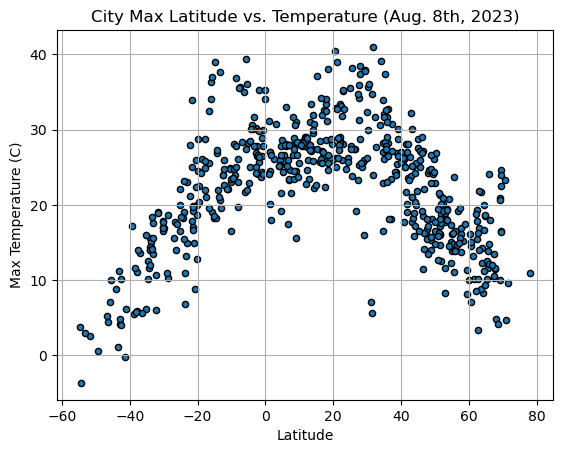

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y="Max Temp", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

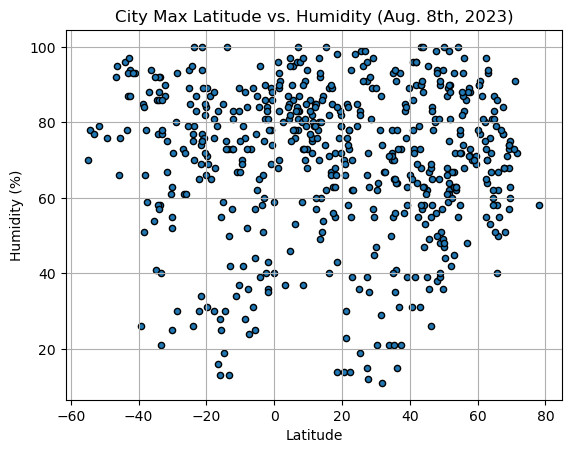

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y="Humidity", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

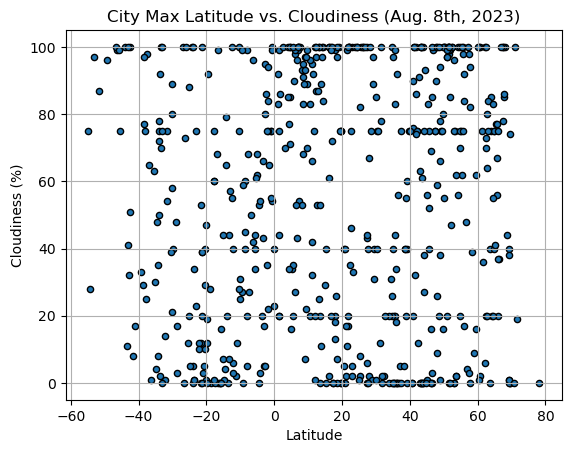

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y="Cloudiness", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

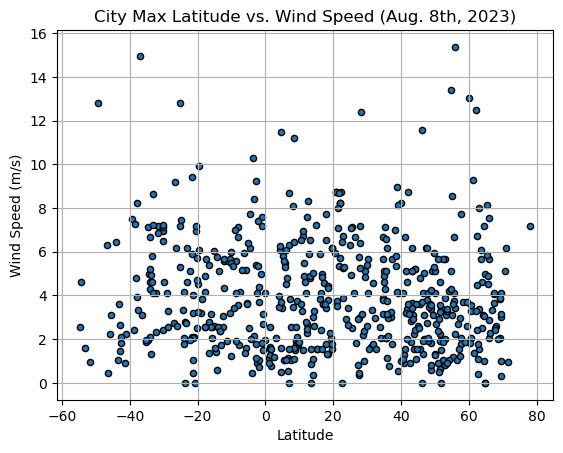

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y="Wind Speed", kind="scatter", marker="o", edgecolor="k")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (Aug. 8th, 2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def linreg_plots(xvalues, yvalues, xlabel, ylabel):
    x_values = xvalues
    y_values = yvalues
    x_label = xlabel
    y_label = ylabel
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_value = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_value,(xvalues.min(),yvalues.min()),fontsize=15,color="red")
    correlation = st.pearsonr(xvalues,yvalues)
    print(f"The r value is: {correlation[0]}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san patricio,28.0170,-97.5169,37.40,35,2,6.38,US,1691517981
2,ilulissat,69.2167,-51.1000,10.01,57,40,2.06,GL,1691517981
3,olonkinbyen,70.9221,-8.7187,4.71,91,100,6.19,SJ,1691517981
4,jamestown,42.0970,-79.2353,23.62,64,75,8.75,US,1691517827
5,yellowknife,62.4560,-114.3525,19.29,55,20,6.71,CA,1691517752


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,15.61,88,75,6.69,ZA,1691517980
6,adamstown,-25.0660,-130.1015,22.13,89,88,12.80,PN,1691517981
7,invercargill,-46.4000,168.3500,4.45,95,99,0.45,NZ,1691517741
9,chonchi,-42.6128,-73.8092,10.07,94,100,1.81,CL,1691517395
10,grytviken,-54.2811,-36.5092,-3.68,78,28,4.62,GS,1691517983


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.6554992347956757


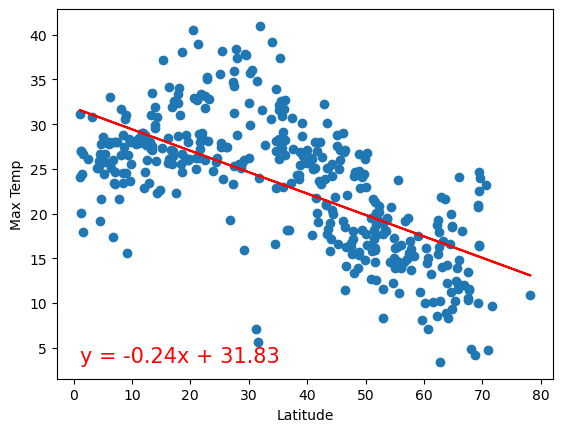

In [79]:
# Linear regression on Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: 0.8353967454391358


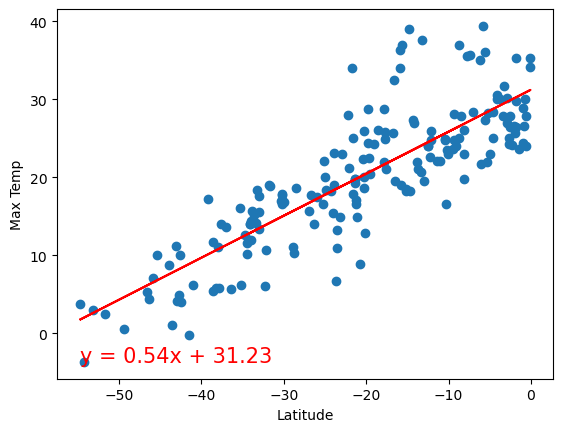

In [80]:
# Linear regression on Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Max Temp"]
xlabel = "Latitude"
ylabel = "Max Temp"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:**
With the linear regression plots we can see that the closer you are to the Ecuator line the higher the temperatures are. The value of r is consistent with this in both graphs, since the Northern Hemisphere shows a negative correlation: more to the north, means further for the ecuator so temperatures drop. As for the Southern Hemisphere, the further from zero is also further from the ecuator, that is why we have a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.09387873778533433


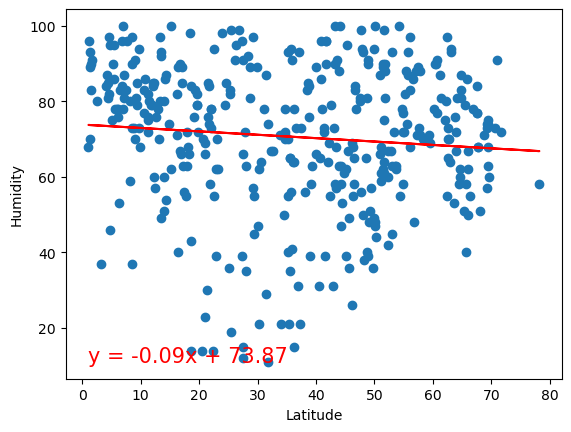

In [81]:
# Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: -0.22033802037645983


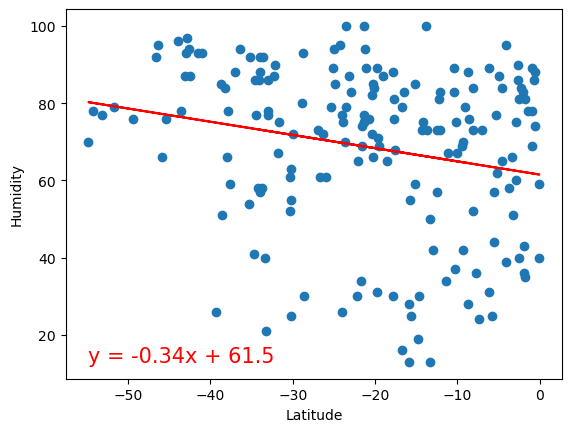

In [82]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Humidity"]
xlabel = "Latitude"
ylabel = "Humidity"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** 
Humidity correlation is not as high as the Temperature, so Latitude might not be a good indicator of how Humidity will be around the world.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.0824567270615158


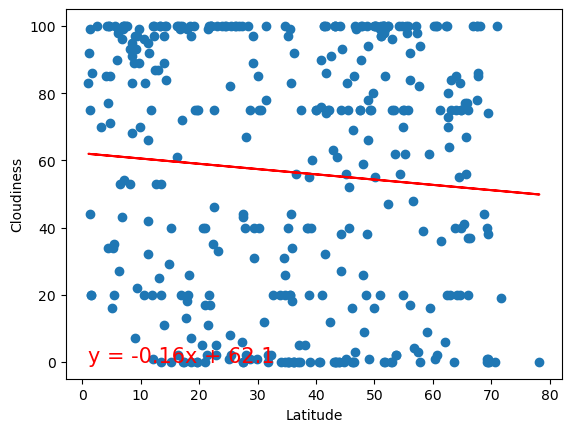

In [83]:
# Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: -0.11968927874362743


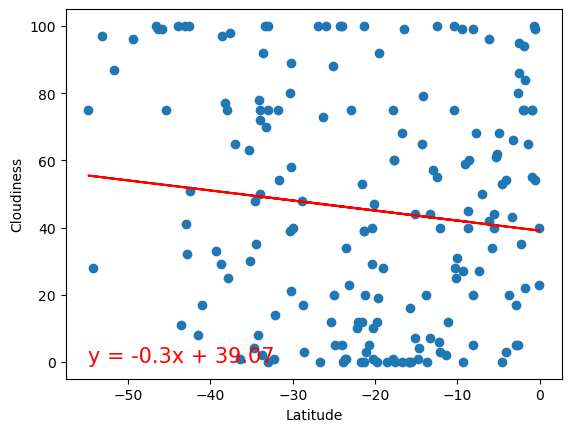

In [84]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Cloudiness"]
xlabel = "Latitude"
ylabel = "Cloudiness"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** As with Humidity, we can see that cloudiness is not highly related to Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.022549598923178787


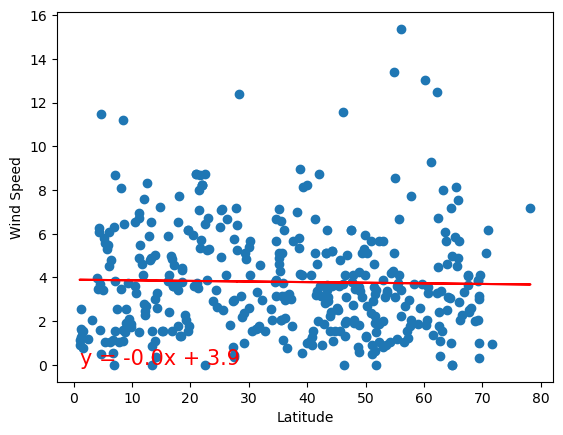

In [85]:
# Northern Hemisphere
xvalues= northern_hemi_df["Lat"]
yvalues= northern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

The r value is: -0.03649687252304375


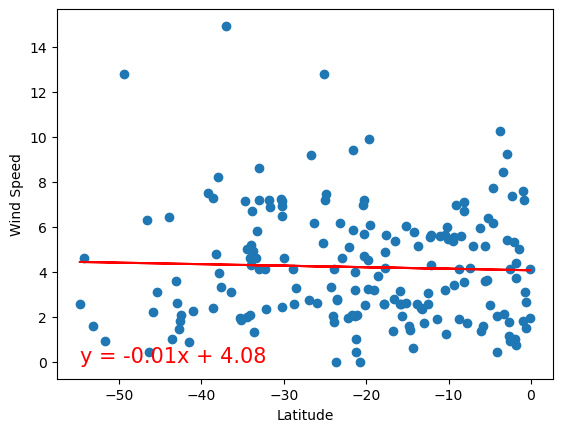

In [86]:
# Southern Hemisphere
xvalues= southern_hemi_df["Lat"]
yvalues= southern_hemi_df["Wind Speed"]
xlabel = "Latitude"
ylabel = "Wind Speed"
linreg_plots(xvalues,yvalues,xlabel,ylabel)

**Discussion about the linear relationship:** Here we have the r values closest to zero of all our graphs, so wind speed is definitely not related to Latitude.